In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

pd.options.mode.chained_assignment = None

In [2]:
movies2 = pd.read_csv("C:/Users/bratu/PycharmProjects/pythonProject/movies_metadata.csv", low_memory=False)

### The budget column

In [3]:
movies2["budget"]

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45466, dtype: object

In [4]:
movies2["budget"].isnull().sum()

0

In [5]:
movies2["budget"].value_counts(normalize=True)

0           0.804403
5000000     0.006290
10000000    0.005697
20000000    0.005345
2000000     0.005323
              ...   
923         0.000022
72500000    0.000022
2160000     0.000022
4439832     0.000022
1254040     0.000022
Name: budget, Length: 1226, dtype: float64

In [6]:
movies2["budget"] = movies2.budget.apply(lambda row: int(row) if row.isnumeric() else 2000000)

In [7]:
movies2["budget"]

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45466, dtype: int64

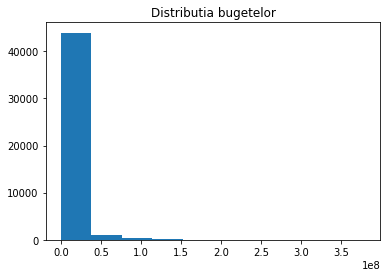

In [8]:
plt.hist(movies2["budget"])
plt.title("The distribution of the budgets")
plt.show()
plt.close()

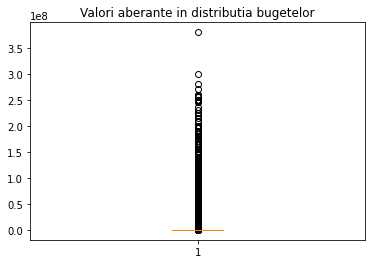

In [9]:
plt.boxplot(movies2["budget"])
plt.title("Outliers in budgets distribution")
plt.show()
plt.close()

In [10]:
movies2 = movies2[movies2["budget"] > 0]

In [11]:
movies2["budget"] = movies2.budget.apply(lambda row: row if row >= 200000 else 200000)

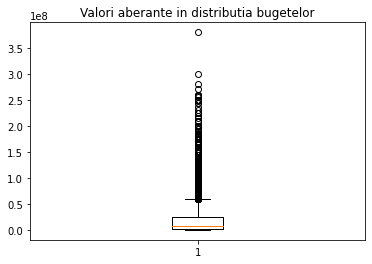

In [12]:
plt.boxplot(movies2["budget"])
plt.title("Outliers in budgets distribution")
plt.show()
plt.close()

In [13]:
q1 = np.percentile(movies2["budget"], 25)
q3 = np.percentile(movies2["budget"], 75)
iqr = q3 - q1
q_min, q_max = int(q1 - 3*iqr), int(q3 + 3*iqr)
q_min, q_max

(-67000000, 94000000)

In [14]:
movies2["budget"] = movies2["budget"].clip(q_min, q_max)

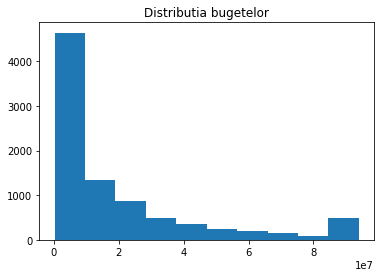

In [15]:
plt.hist(movies2["budget"])
plt.title("The distribution of the budgets")
plt.show()
plt.close()

### Coloana vote_average(rating)

In [16]:
movies2["vote_average"]

0        7.7
1        6.9
3        6.1
5        7.7
6        6.2
        ... 
45402    3.5
45408    5.0
45409    5.8
45412    4.0
45422    1.0
Name: vote_average, Length: 8893, dtype: float64

In [17]:
movies2.rename(columns={"vote_average": "rating"}, inplace=True)

In [18]:
movies2["rating"].isnull().sum()

3

In [19]:
movies2["rating"].describe()

count    8890.000000
mean        6.013273
std         1.247683
min         0.000000
25%         5.400000
50%         6.200000
75%         6.800000
max        10.000000
Name: rating, dtype: float64

In [20]:
movies2["rating"].fillna(6.2, inplace=True)

In [21]:
movies2["rating"] = movies2.rating.apply(lambda row: row if row >= 1 else 1)

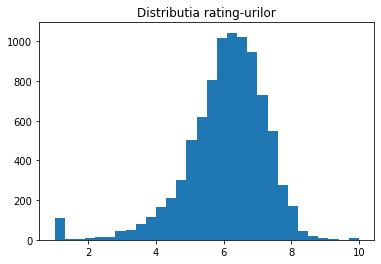

In [22]:
plt.hist(movies2["rating"], bins=30)
plt.title("The distribution of the ratings")
plt.show()
plt.close()

### The new cleaned dataframe

In [23]:
movies_cleaned2 = movies2[["rating", "budget"]].copy()
movies_cleaned2

,rating,budget
0,7.7,30000000
1,6.9,65000000
3,6.1,16000000
5,7.7,60000000
6,6.2,58000000
...,...,...
45402,3.5,2000000
45408,5.0,2000000
45409,5.8,800000
45412,4.0,2000000


### The genres column

In [24]:
genres_df = movies2["genres"].reset_index()
import ast

genres_list = []

for i in range(len(genres_df["genres"])):
    try:
        genres = ast.literal_eval(genres_df["genres"][i])
        genres_list.append(genres[0]["name"])
    except:
        genres_list.append(genres_list[-1])

In [25]:
movies2["genres"] = genres_list

In [26]:
movies2["genres"]

0        Animation
1        Adventure
3           Comedy
5           Action
6           Comedy
           ...    
45402       Comedy
45408       Comedy
45409       Comedy
45412      Romance
45422       Action
Name: genres, Length: 8893, dtype: object

In [27]:
movies2.groupby('genres').id.count().sort_values()

genres
Odyssey Media              1
Aniplex                    1
Carousel Productions       1
Foreign                    6
TV Movie                  19
History                   50
Western                   50
Music                     58
War                       59
Family                    87
Mystery                  108
Science Fiction          177
Romance                  191
Fantasy                  205
Documentary              210
Animation                233
Thriller                 385
Crime                    409
Adventure                550
Horror                   724
Action                  1461
Comedy                  1693
Drama                   2215
Name: id, dtype: int64

In [28]:
movies2 = movies2[(movies2["genres"] != "Aniplex") & (movies2["genres"] != "Odyssey Media") & (movies2["genres"] != "Foreign") &
                (movies2["genres"] != "Carousel Productions") & (movies2["genres"] != "TV Movie")]

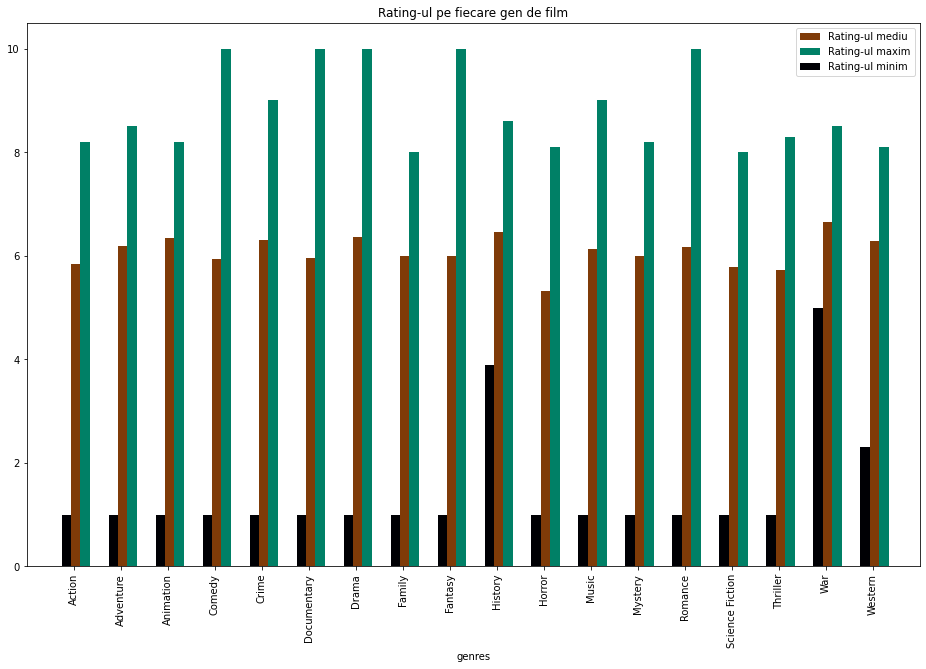

In [29]:
movies2.groupby("genres").rating.mean().plot(kind="bar", figsize=(16, 10), label="The mean rating", colormap="PuOr", width=0.2,
                                             title="The rating for each genre of the movie", position=0.3)
movies2.groupby("genres").rating.max().plot(kind="bar", figsize=(16, 10), label="The maximum rating", colormap="summer", width=0.2,
                                             position=-0.7)
movies2.groupby("genres").rating.min().plot(kind="bar", figsize=(16, 10), label="The minimum rating", colormap="inferno", width=0.2,
                                             position=1.3)
plt.legend()
plt.xlim(-1, 18)
plt.show()
plt.close()

In [30]:
dummy_genres = pd.get_dummies(movies2["genres"])

In [31]:
movies_cleaned2 = pd.concat([movies_cleaned2, dummy_genres], axis=1, join="inner")
movies_cleaned2.dropna(inplace=True)

In [32]:
movies_cleaned2

,rating,budget,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,7.7,30000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.9,65000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.1,16000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,7.7,60000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6.2,58000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45402,3.5,2000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45408,5.0,2000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45409,5.8,800000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45412,4.0,2000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### The original_language column

In [33]:
movies2['original_language'].isnull().sum()

0

In [34]:
movies2["original_language"].value_counts()

en    7411
fr     240
ru     139
hi     131
es     113
de      96
ja      84
it      83
ko      66
zh      65
fi      63
da      36
pt      34
ta      33
cn      33
sv      28
nl      27
no      23
pl      19
ml      15
sr      13
th      11
tr      10
te      10
he      10
ro       9
hu       7
fa       4
et       4
id       4
el       4
mr       3
sl       3
cs       3
is       3
xx       2
lv       2
uk       2
ar       2
lo       2
ur       2
nb       2
ca       2
vi       2
ku       1
la       1
bg       1
kn       1
bs       1
bm       1
af       1
sq       1
ps       1
bo       1
Name: original_language, dtype: int64

In [35]:
movies2 = movies2[(movies2["original_language"] == "en") | (movies2["original_language"] == "fr") | (movies2["original_language"] == "ru") | 
         (movies2["original_language"] == "hi") | (movies2["original_language"] == "es") | (movies2["original_language"] == "de") |
         (movies2["original_language"] == "ja") | (movies2["original_language"] == "it") | (movies2["original_language"] == "it")]

In [36]:
movies2["original_language"].value_counts()

en    7411
fr     240
ru     139
hi     131
es     113
de      96
ja      84
it      83
Name: original_language, dtype: int64

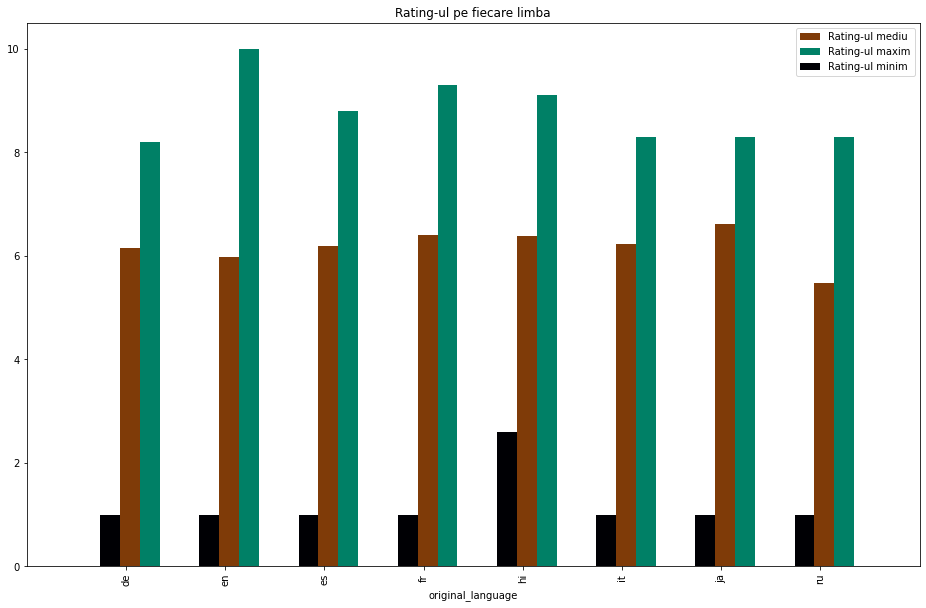

In [37]:
movies2.groupby("original_language").rating.mean().plot(kind="bar", figsize=(16, 10), label="The mean rating", colormap="PuOr", width=0.2,
                                             title="The rating for each language of the movie", position=0.3)
movies2.groupby("original_language").rating.max().plot(kind="bar", figsize=(16, 10), label="The maximum rating", colormap="summer", width=0.2,
                                             position=-0.7)
movies2.groupby("original_language").rating.min().plot(kind="bar", figsize=(16, 10), label="The minimum rating", colormap="inferno", width=0.2,
                                             position=1.3)
plt.legend()
plt.xlim(-1, 8)
plt.show()
plt.close()

In [38]:
dummy_languages = pd.get_dummies(movies2["original_language"])
dummy_languages.columns = ["German", "English", "Spanish", "French", "Indian", "Italian", "Japanese", "Russian"]
dummy_languages

,German,English,Spanish,French,Indian,Italian,Japanese,Russian
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
45402,0,0,0,0,0,0,0,1
45408,0,0,0,0,0,0,0,1
45409,0,1,0,0,0,0,0,0
45412,0,1,0,0,0,0,0,0


In [39]:
movies_cleaned2 = pd.concat([movies_cleaned2, dummy_languages], axis=1, join="inner")
movies_cleaned2.dropna(inplace=True)
movies_cleaned2

,rating,budget,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,War,Western,German,English,Spanish,French,Indian,Italian,Japanese,Russian
0,7.7,30000000,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,6.9,65000000,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,6.1,16000000,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,7.7,60000000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,6.2,58000000,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45402,3.5,2000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45408,5.0,2000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45409,5.8,800000,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
45412,4.0,2000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### The release_date(year) column

In [40]:
movies2["release_date"].isnull().sum()

4

In [41]:
movies2["release_date"].value_counts()

2007-01-01    16
2005-01-01    16
2008-01-01    13
2006-01-01    12
2011-09-09     9
              ..
1935-08-30     1
1984-03-11     1
1987-06-25     1
1979-12-13     1
2006-11-23     1
Name: release_date, Length: 5357, dtype: int64

In [42]:
try:
    movies2["release_date"].fillna("2007-01-01", inplace=True)
except:
    pass

In [43]:
release_date_df = movies2["release_date"].reset_index()

In [44]:
year = []
for i in range(len(release_date_df)):
    year.append(int(release_date_df["release_date"][i].split("-")[0]))

In [45]:
movies2["year"] = year

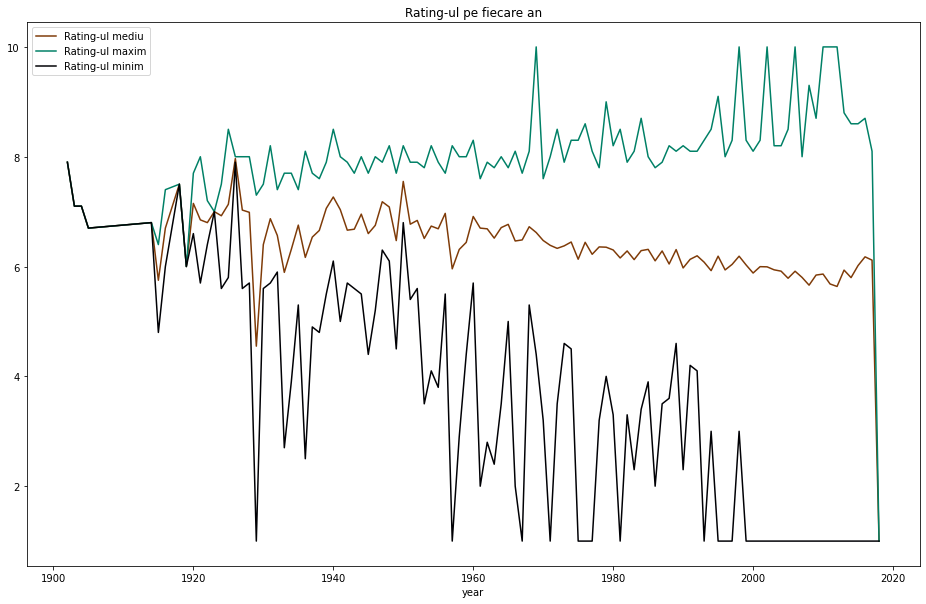

In [46]:
movies2.groupby("year").rating.mean().plot(kind="line", figsize=(16, 10), label="The mean rating", colormap="PuOr",
                                             title="The rating for each released year of the movies")
movies2.groupby("year").rating.max().plot(kind="line", figsize=(16, 10), label="The maximum rating", colormap="summer")
movies2.groupby("year").rating.min().plot(kind="line", figsize=(16, 10), label="The minimum rating", colormap="inferno")
plt.legend()
plt.show()
plt.close()

In [47]:
movies_cleaned2["year"] = movies2["year"]

### The runtime(is_longer) column

In [48]:
movies2["runtime"].isnull().sum()

3

In [49]:
movies2["runtime"].describe()

count    8294.000000
mean      104.988305
std        27.741755
min         0.000000
25%        91.000000
50%       101.000000
75%       115.000000
max       705.000000
Name: runtime, dtype: float64

In [50]:
movies2["runtime"].fillna(101, inplace=True)
movies2["runtime"] = movies2.runtime.apply(lambda row: row if row > 0 else 101)
movies2["runtime"].isnull().sum()

0

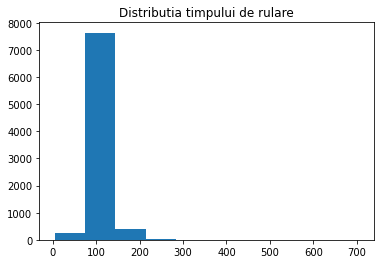

In [51]:
plt.hist(movies2["runtime"], bins=10)
plt.title("The distribution of the runtimes")
plt.show()
plt.close()

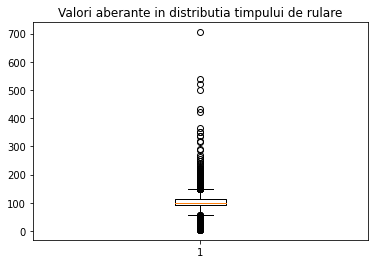

In [52]:
plt.boxplot(movies2["runtime"])
plt.title("Outliers in the runtimes distribution")
plt.show()
plt.close()

In [53]:
q1 = np.percentile(movies2["runtime"], 25)
q3 = np.percentile(movies2["runtime"], 75)
iqr = q3 - q1
q_min, q_max = int(q1 - 3*iqr), int(q3 + 3*iqr)
q_min, q_max

(23, 184)

In [54]:
movies2["runtime"] = movies2["runtime"].clip(q_min, q_max)

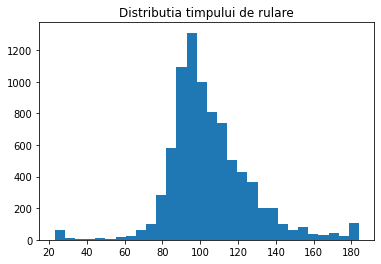

In [55]:
plt.hist(movies2["runtime"], bins=30)
plt.title("The distribution of the runtimes")
plt.show()
plt.close()

In [56]:
movies2["is_longer"] = movies2.runtime.apply(lambda row: 0 if row < 120 else 1)

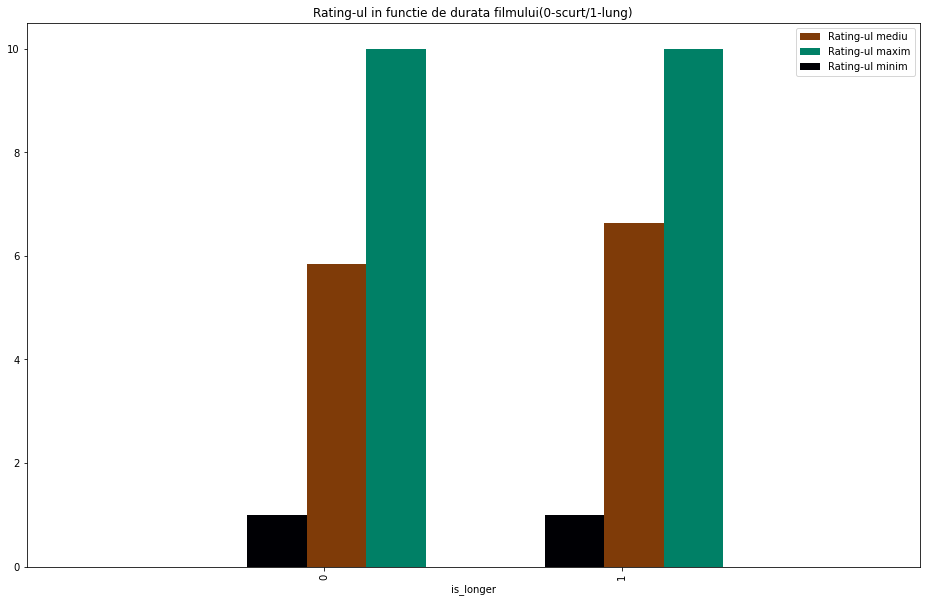

In [57]:
movies2.groupby("is_longer").rating.mean().plot(kind="bar", figsize=(16, 10), label="The mean rating", colormap="PuOr", width=0.2,
                                             title="The rating according to the runtime of the movie(0-short/1-long)", position=0.3)
movies2.groupby("is_longer").rating.max().plot(kind="bar", figsize=(16, 10), label="The maximum rating", colormap="summer", width=0.2,
                                             position=-0.7)
movies2.groupby("is_longer").rating.min().plot(kind="bar", figsize=(16, 10), label="The minimum rating", colormap="inferno", width=0.2,
                                             position=1.3)
plt.legend()
plt.xlim(-1, 2)
plt.show()
plt.close()

In [58]:
movies_cleaned2["runtime"] = movies2["runtime"]

### The final dataframe

In [59]:
movies_cleaned2.dropna(inplace=True)

In [60]:
rating_1_2 = movies_cleaned2[(movies_cleaned2["rating"] >= 1) & (movies_cleaned2["rating"] <= 2)]
rating_2_3 = movies_cleaned2[(movies_cleaned2["rating"] >= 2.1) & (movies_cleaned2["rating"] <= 3)]
rating_3_4 = movies_cleaned2[(movies_cleaned2["rating"] >= 3.1) & (movies_cleaned2["rating"] <= 4)]
rating_4_5 = movies_cleaned2[(movies_cleaned2["rating"] >= 4.1) & (movies_cleaned2["rating"] <= 5)]
rating_5_6 = movies_cleaned2[(movies_cleaned2["rating"] >= 5.1) & (movies_cleaned2["rating"] <= 6)]
rating_6_7 = movies_cleaned2[(movies_cleaned2["rating"] >= 6.1) & (movies_cleaned2["rating"] <= 7)]
rating_7_8 = movies_cleaned2[(movies_cleaned2["rating"] >= 7.1) & (movies_cleaned2["rating"] <= 8)]
rating_8_9 = movies_cleaned2[(movies_cleaned2["rating"] >= 8.1) & (movies_cleaned2["rating"] <= 9)]
rating_1_2 = rating_1_2.iloc[:75, :]
rating_3_4 = rating_3_4.iloc[:75, :]
rating_4_5 = rating_4_5.iloc[:75, :]
rating_5_6 = rating_5_6.iloc[:75, :]
rating_6_7 = rating_6_7.iloc[:75, :]
rating_7_8 = rating_7_8.iloc[:75, :]
rating_8_9 = rating_8_9.iloc[:75, :]

In [61]:
frames = [rating_1_2, rating_2_3, rating_3_4, rating_4_5, rating_5_6, rating_6_7, rating_7_8, rating_8_9]
movies_cleaned2 = pd.concat(frames)

In [62]:
movies_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1370 to 36180
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           600 non-null    float64
 1   budget           600 non-null    int64  
 2   Action           600 non-null    uint8  
 3   Adventure        600 non-null    uint8  
 4   Animation        600 non-null    uint8  
 5   Comedy           600 non-null    uint8  
 6   Crime            600 non-null    uint8  
 7   Documentary      600 non-null    uint8  
 8   Drama            600 non-null    uint8  
 9   Family           600 non-null    uint8  
 10  Fantasy          600 non-null    uint8  
 11  History          600 non-null    uint8  
 12  Horror           600 non-null    uint8  
 13  Music            600 non-null    uint8  
 14  Mystery          600 non-null    uint8  
 15  Romance          600 non-null    uint8  
 16  Science Fiction  600 non-null    uint8  
 17  Thriller   

### Creating a copy of the dataframe(which will contain the budget, year and the runtime columns), for using it at normalization the values when we test our final model

In [63]:
movies_cleaned2_copy = movies_cleaned2[["budget", "year", "runtime"]]
movies_cleaned2_copy = movies_cleaned2_copy.reset_index()
movies_cleaned2_copy.drop('index', axis=1, inplace=True)

### The normalization of the budget, year and runtime columns

In [64]:
movies_cleaned2["budget"] = (movies_cleaned2["budget"] - movies_cleaned2["budget"].min()) / (movies_cleaned2["budget"].max() - movies_cleaned2["budget"].min())
movies_cleaned2["year"] = (movies_cleaned2["year"] - movies_cleaned2["year"].min()) / (movies_cleaned2["year"].max() - movies_cleaned2["year"].min())
movies_cleaned2["runtime"] = (movies_cleaned2["runtime"] - movies_cleaned2["runtime"].min()) / (movies_cleaned2["runtime"].max() - movies_cleaned2["runtime"].min())
movies_cleaned2

,rating,budget,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,German,English,Spanish,French,Indian,Italian,Japanese,Russian,year,runtime
1370,1.0,0.003198,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.752688,0.559006
2628,2.0,0.019190,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.655914,0.546584
2842,1.0,0.005330,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.795699,0.521739
4958,1.0,0.253731,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.602151,0.521739
6478,1.0,0.010661,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.774194,0.447205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31878,8.2,0.000000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.956989,0.000000
32144,8.1,0.061834,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.967742,0.583851
33420,8.6,0.136461,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.967742,1.000000
34001,8.2,0.157783,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.774194,1.000000


In [65]:
movies_cleaned2 = movies_cleaned2.reset_index()
movies_cleaned2.drop('index', axis=1, inplace=True)

### Machine learning model (KNN-Regresor)

In [66]:
x = movies_cleaned2.iloc[:, 1:]
y = movies_cleaned2.iloc[:, 0]

In [67]:
X_train, X_test, y_train, y_validate = train_test_split(x, y, train_size=0.9, test_size=0.1, random_state=2755)

In [69]:
regresor = KNeighborsRegressor(n_neighbors = 6, weights="distance") # am creat regresorul nostru

regresor.fit(X_train, y_train) # l-am antrenat cu datele din setul de antrenament

predictii_regresor = regresor.predict(X_test) # am efectuat predictii, bazate pe datele de test

round(regresor.score(X_test, y_validate), 2)

0.78